In [1]:
# Initialize and Import Required Modules

In [2]:
# General Libraries
import torch
import argparse
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [3]:
# Import the MNIST Autoencoder file
import MNIST_121  

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define arguments
args = argparse.Namespace(
    data_path="../data",
    batch_size=8,
    latent_dim=128,
    device=device
)

In [4]:
#Load the Dataset and Check It

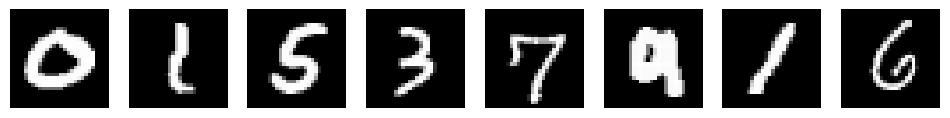

In [5]:
# Load dataset
train_loader, val_loader, test_loader = MNIST_121.load_data(args)

# Retrieve a batch of images
images, _ = next(iter(train_loader))

# Visualize some images
fig, axes = plt.subplots(1, 8, figsize=(12, 4))
for i in range(8):
    img = images[i].squeeze()
    img = img.numpy()
    axes[i].imshow(img, cmap="gray")
    axes[i].axis("off")
plt.show()

In [6]:
#Verify the Autoencoder Model Architecture

In [7]:
# Initialize model
model = MNIST_121.Autoencoder(args.latent_dim).to(args.device)

# Print model summary
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=784, out_features=128, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=784, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(16, 7, 7))
    (3): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): ReLU()
    (5): ConvTranspose2d(8, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (6): Sigmoid()
  )
)


In [8]:
#Run a Single Forward Pass

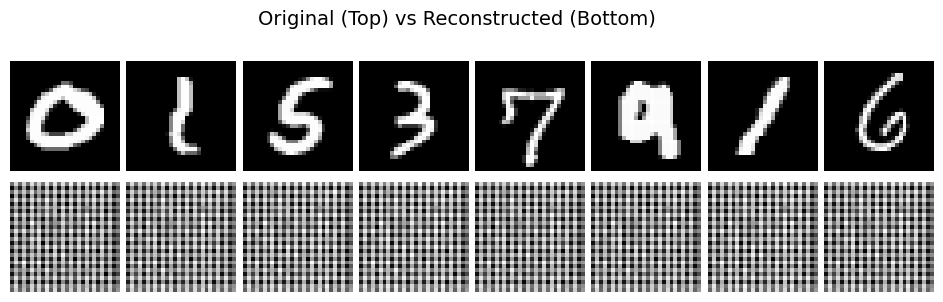

In [9]:
# Move images to the correct device
images = images.to(args.device)

# Pass through the autoencoder
with torch.no_grad():
    recon_images = model(images)

# Convert images to CPU for visualization
images = images.cpu()
recon_images = recon_images.cpu()

# Create the figure
fig, axes = plt.subplots(2, 8, figsize=(12, 3))
plt.subplots_adjust(wspace=0, hspace=0.1)

# Add row titles manually
fig.suptitle("Original (Top) vs Reconstructed (Bottom)", fontsize=14, y=1.05)

for i in range(8):
    # Original images
    axes[0, i].imshow(images[i].squeeze().numpy(), cmap="gray")
    axes[0, i].axis("off")

    # Reconstructed images
    axes[1, i].imshow(recon_images[i].squeeze().numpy(), cmap="gray")
    axes[1, i].axis("off")

plt.show()


In [10]:
#Train for One Epoch to Check Loss Computation

In [11]:
MNIST_121.train_autoencoder(model, train_loader, val_loader, args, epochs=15)

Epoch [1/15], Train Loss: 0.0142, Val Loss: 0.0054


Epoch [2/15], Train Loss: 0.0043, Val Loss: 0.0036


Epoch [3/15], Train Loss: 0.0032, Val Loss: 0.0029


Epoch [4/15], Train Loss: 0.0027, Val Loss: 0.0025


Epoch [5/15], Train Loss: 0.0024, Val Loss: 0.0023


Epoch [6/15], Train Loss: 0.0022, Val Loss: 0.0021


Epoch [7/15], Train Loss: 0.0020, Val Loss: 0.0020


Epoch [8/15], Train Loss: 0.0019, Val Loss: 0.0019


Epoch [9/15], Train Loss: 0.0018, Val Loss: 0.0018


Epoch [10/15], Train Loss: 0.0017, Val Loss: 0.0018


Epoch [11/15], Train Loss: 0.0017, Val Loss: 0.0017


Epoch [12/15], Train Loss: 0.0016, Val Loss: 0.0017


Epoch [13/15], Train Loss: 0.0016, Val Loss: 0.0017


Epoch [14/15], Train Loss: 0.0016, Val Loss: 0.0016


Epoch [15/15], Train Loss: 0.0015, Val Loss: 0.0016


In [12]:
#Verify Reconstruction

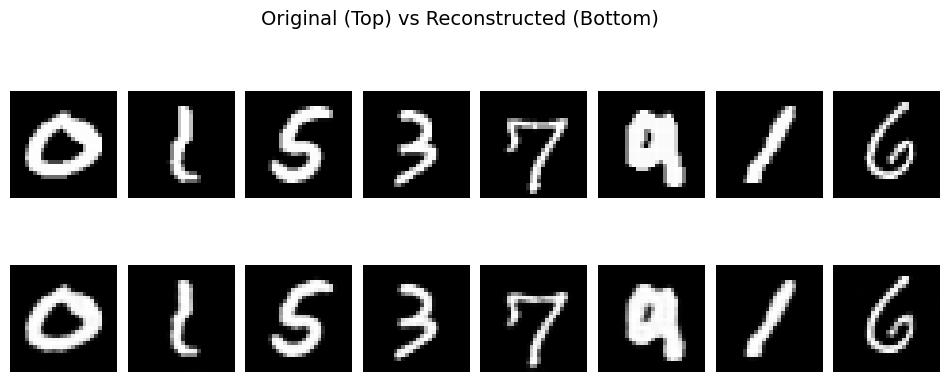

In [13]:
# Move images to the correct device
images = images.to(args.device)

# Pass images through the autoencoder to get reconstructions
with torch.no_grad():
    recon_images = model(images)

# Convert to CPU for visualization
images = images.cpu()
recon_images = recon_images.cpu()

# Create the figure
fig, axes = plt.subplots(2, 8, figsize=(12, 4))  # Adjusted figure size
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Less spacing

# Set main title
fig.suptitle("Original (Top) vs Reconstructed (Bottom)", fontsize=14, y=1.05)

for i in range(8):
    # Original images
    img = images[i].numpy().transpose(1, 2, 0)  # For RGB images, reorder channels
    axes[0, i].imshow(img, cmap="gray" if img.shape[2] == 1 else None)
    axes[0, i].axis("off")

    # Reconstructed images
    recon_img = recon_images[i].numpy().transpose(1, 2, 0)  # Same for recon images
    axes[1, i].imshow(recon_img, cmap="gray" if recon_img.shape[2] == 1 else None)
    axes[1, i].axis("off")

plt.show()


In [14]:
#classifier traning

In [15]:
classifier = MNIST_121.Classifier(args.latent_dim).to(args.device)
MNIST_121.train_classifier(model, classifier, train_loader, val_loader, args, epochs=15)

Epoch [1/15], Train Loss: 0.3183, Train Acc: 90.64%, Val Acc: 95.00%


Epoch [2/15], Train Loss: 0.1740, Train Acc: 94.78%, Val Acc: 96.29%


Epoch [3/15], Train Loss: 0.1450, Train Acc: 95.52%, Val Acc: 96.66%


Epoch [4/15], Train Loss: 0.1299, Train Acc: 95.93%, Val Acc: 96.91%


Epoch [5/15], Train Loss: 0.1198, Train Acc: 96.26%, Val Acc: 97.01%


Epoch [6/15], Train Loss: 0.1149, Train Acc: 96.37%, Val Acc: 97.04%


Epoch [7/15], Train Loss: 0.1094, Train Acc: 96.59%, Val Acc: 97.16%


Epoch [8/15], Train Loss: 0.1049, Train Acc: 96.70%, Val Acc: 97.04%


Epoch [9/15], Train Loss: 0.0996, Train Acc: 96.82%, Val Acc: 97.02%


Epoch [10/15], Train Loss: 0.0943, Train Acc: 96.89%, Val Acc: 97.16%


Epoch [11/15], Train Loss: 0.0960, Train Acc: 96.92%, Val Acc: 97.20%


Epoch [12/15], Train Loss: 0.0922, Train Acc: 96.99%, Val Acc: 97.32%


Epoch [13/15], Train Loss: 0.0919, Train Acc: 97.11%, Val Acc: 97.28%


Epoch [14/15], Train Loss: 0.0862, Train Acc: 97.21%, Val Acc: 97.22%


Epoch [15/15], Train Loss: 0.0870, Train Acc: 97.15%, Val Acc: 97.05%
